In [1]:
from pyrootmemo.io import read_csv_roots
roots = read_csv_roots('test_root_data.csv')

In [2]:
from pyrootmemo.geometry import FailureSurface
from collections import namedtuple
Parameter = namedtuple("parameter", "value unit")
failure_surface = FailureSurface(cross_sectional_area = Parameter(1.0, 'm^2'))


271.4336052701581 pascal


(<Figure size 432x288 with 1 Axes>,
 <Axes: xlabel='Force in individual root [N]', ylabel='Total force in root bundle [N]'>)

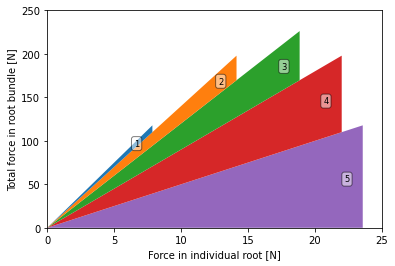

In [3]:
from pyrootmemo.fbm import Fbm
fbm = Fbm(roots, 1.0)
print(fbm.peak_reinforcement(failure_surface).to('Pa'))
fbm.plot()

In [4]:
from pyrootmemo.wwm import Wwm
wwm = Wwm(roots)
print(wwm.peak_reinforcement(failure_surface).to('Pa'))

358.1415625092364 pascal


178.84896308939236 pascal


(<Figure size 432x288 with 1 Axes>,
 <Axes: xlabel='Displacement [mm]', ylabel='Total force in root bundle [N]'>)

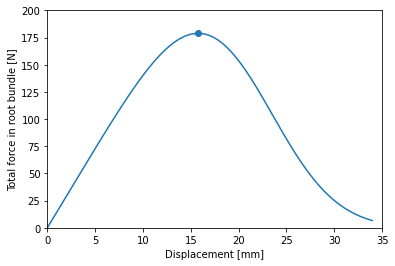

In [5]:
from pyrootmemo.rbmw import Rbmw
rbmw = Rbmw(roots, 4.0)
print(rbmw.peak_reinforcement(failure_surface).to('Pa'))
rbmw.plot()

In [6]:
from pyrootmemo.materials import Soil, Interface
soil = Soil(
    'test_soil',
    cohesion = Parameter(10, 'kPa'),
    friction_angle = Parameter(30, 'degrees')
)
interface = Interface(shear_strength = Parameter(10, 'kPa'))
from pyrootmemo.geometry import SoilProfile, FailureSurface
soil_profile = SoilProfile([soil], depth = Parameter([100], 'm'))
failure_surface = FailureSurface(
    depth = Parameter(1.0, 'm'),
    shear_zone_thickness = Parameter(2.0, 'mm'),
    cross_sectional_area = Parameter(1.0, 'm^2')
)

In [9]:
from pyrootmemo.waldron import Waldron
from pyrootmemo.tools.helpers import units
import numpy as np
waldron = Waldron(roots, interface, soil_profile, failure_surface, breakage = True, slippage = True)
disp = 500 * units('mm')
up, k, dup_dus, dup_dh, dk_dus, dk_dh = waldron._get_orientation_parameters(disp, waldron.failure_surface.shear_zone_thickness)
Tp, dTp_dup, S, b = waldron.pullout.force(up, jac = False)
print(np.sum(k * Tp) / waldron.failure_surface.cross_sectional_area)
print(waldron.reinforcement(200).to('kPa'))


188.9293596339724 newton / meter ** 2
0.18957436035286657 kilopascal


In [8]:
a = np.array([[1,2],[3,4],[5,6]])
print(a.shape)
b = np.array([3,4,5])
print(b[:, np.newaxis].shape)
b[:, np.newaxis] > a

(3, 2)
(3, 1)


array([[ True,  True],
       [ True, False],
       [False, False]])